## 4.1

*Asset A has an expected return of 8% and a standard deviation of 10%.  Asset B has an expected return of 12% and a standard deviation of 16%.*

1.  *What is the expected return of the following portfolios?*

(a) *20% asset A and 80% asset B*

(b) *50% asset A and 50% asset B*

(c) *80% asset A and 20% asset B*

In [3]:
meanA = 0.08 
meanB = 0.12

print(f"(a) {0.2*meanA + 0.8*meanB:.1%}")
print(f"(b) {0.5*meanA + 0.5*meanB:.1%}")
print(f"(c) {0.8*meanA + 0.2*meanB:.1%}")

(a) 11.2%
(b) 10.0%
(c) 8.8%


2.  *Assume the correlation between the two assets is 20%.  What are the standard deviations of the three portfolios in question 1?*

In [5]:
from math import sqrt 

stdevA = 0.12 
stdevB = 0.16
corr = 0.2

def stdev(wtA, corr):
    wtB = 1 - wtA
    var = (
        wtA**2 * stdevA**2 
        + wtB**2 * stdevB**2
        + 2 * wtA * wtB * corr * stdevA * stdevB
    )
    return sqrt(var)

print(f"(a) {stdev(0.2, corr):.2%}")
print(f"(b) {stdev(0.5, corr):.2%}")
print(f"(c) {stdev(0.8, corr):.2%}")

(a) 13.49%
(b) 10.92%
(c) 10.71%


3.  *Assume the correlation between the two assets is 50%.  What are the standard deviations of the three portfolios in question 1?*

In [6]:
corr = 0.5

print(f"(a) {stdev(0.2, corr):.2%}")
print(f"(b) {stdev(0.5, corr):.2%}")
print(f"(c) {stdev(0.8, corr):.2%}")

(a) 14.15%
(b) 12.17%
(c) 11.54%


## 4.2

*Consider three assets with the following standard deviations and correlations:*

    sd1, sd2, sd3 = 0.1, 0.15, 0.2

    corr12, corr13, corr23 = 0.9, 0.1, 0.3

1. *What is the standard deviation of a portfolio that is invested 60% in asset 1, 30% in asset 2, and 10% in asset 3?*

In [10]:
import numpy as np 

stdevs = np.array([0.1, 0.15, 0.2])
corr = np.diag(np.ones(3)) 
corr[0, 1] = corr[1, 0] = 0.9
corr[0, 2] = corr[2, 0] = 0.1
corr[1, 2] = corr[2, 1] = 0.3 

def stdev(wt1, wt2, wt3):
    w = np.array([wt1, wt2, wt3])
    var = w @ np.diag(stdevs) @ corr @ np.diag(stdevs) @ w
    return np.sqrt(var)

print(f"{stdev(0.6, 0.3, 0.1):.2%}")

10.80%


2. *What is the standard deviation of a portfolio that is invested 60% in asset 1, 10% in asset 2, and 30% in asset 3?*

In [11]:
print(f"{stdev(0.6, 0.1, 0.3):.2%}")

10.15%


3. *Is it possible for the portfolio risk to fall if you lower the weight on asset 2 and increase the weight on the riskier asset 3 by the same amount?  Explain why or why not.*

Yes, this is shown in parts 1 and 2.  Asset 3 is riskier than asset 2 in terms of standard deviation, but it has a lower correlation with asset 1 than asset 2 does, so increasing the weight on asset 3 can improve diversification.

## 4.3

*Show a plot of the mean and standard deviations you can achieve when there is a risky asset with an expected return of 8% and a standard deviation of 12%, you can save at 3%, and you can borrow at 6%.*

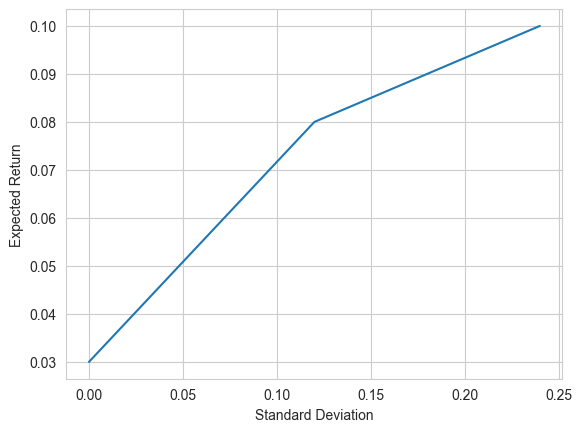

In [13]:
wts = np.arange(0, 2.01, 0.01)
means = [w*0.08 + (1-w)*(0.03 if w<1 else 0.06) for w in wts]
stdevs = 0.12 * wts 

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("whitegrid")

plt.plot(stdevs, means)
plt.xlabel("Standard Deviation")
plt.ylabel("Expected Return")
plt.show()

## 4.4

1. Calculate the least-risk portfolio that has an expected return of 12% when you can save and borrow risk-free at 3% and there are four assets with parameters:

mn1, mn2, mn3, mn4 = 0.08, 0.12, 0.15, 0.12

sd1, sd2, sd3, sd4 = 0.1, 0.15, 0.2, 0.3

corr12, corr13, corr14, corr23, corr24, corr34 = 0.3, 0.2, 0.4, 0.3, 0.4, 0.5.

In [15]:
means = np.array([0.08, 0.12, 0.15, 0.12])
stdevs = np.array([0.1, 0.15, 0.2, 0.3])
rf = 0.03 
corr = np.diag(np.ones(4))
corr[0, 1] = corr[1, 0] = 0.3
corr[0, 2] = corr[2, 0] = 0.2
corr[0, 3] = corr[3, 0] = 0.4
corr[1, 2] = corr[2, 1] = 0.3
corr[1, 3] = corr[3, 1] = 0.4
corr[2, 3] = corr[3, 2] = 0.5

In [20]:
P = np.diag(stdevs) @ corr @ np.diag(stdevs)
q = np.zeros(4).reshape(4, 1)
A = (means - 0.03).reshape(1, 4)
b = [0.12 - 0.03]

from cvxopt import matrix
from cvxopt.solvers import qp

sol = qp(
    P=matrix(P),
    q=matrix(q),
    G=None,
    h=None,
    A=matrix(A),
    b=matrix(b)
)
w = np.array(sol["x"]).flatten()
w

array([ 0.49335891,  0.38592775,  0.35256484, -0.13010248])

2) *Plot the expected return and standard deviation of the portfolio you found in question (1).*

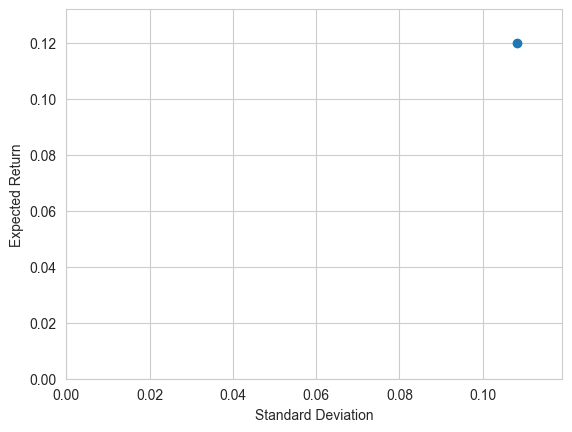

In [21]:
mean = 0.03 + w @ (means - 0.03)
stdev = np.sqrt(w @ P @ w)
plt.scatter(stdev, mean)
plt.xlim((0, 1.1*stdev))
plt.ylim((0, 1.1*mean))
plt.xlabel("Standard Deviation")
plt.ylabel("Expected Return")
plt.show()

## 4.5

*Use the same asset data as in Exercise 4.4 and do the following:*


1. *Find the least-risk portfolios with expected returns of 4%, 6%, 8%, 10%, 12%, 14%, 16%, 18%, and 20%.*

In [23]:
targets = np.arange(0.04, 0.22, 0.02) 

portfolios = [] 
for mu in targets:
    b = [mu - 0.03]
    sol = qp(
        P=matrix(P),
        q=matrix(q),
        G=None,
        h=None,
        A=matrix(A),
        b=matrix(b)
    )
    w = np.array(sol["x"]).flatten()
    portfolios.append(w) 
portfolios

[array([ 0.05481766,  0.04288086,  0.03917387, -0.01445583]),
 array([ 0.16445297,  0.12864258,  0.11752161, -0.04336749]),
 array([ 0.27408828,  0.21440431,  0.19586935, -0.07227915]),
 array([ 0.38372359,  0.30016603,  0.2742171 , -0.10119082]),
 array([ 0.49335891,  0.38592775,  0.35256484, -0.13010248]),
 array([ 0.60299422,  0.47168947,  0.43091258, -0.15901414]),
 array([ 0.71262953,  0.55745119,  0.50926032, -0.1879258 ]),
 array([ 0.82226484,  0.64321292,  0.58760806, -0.21683746]),
 array([ 0.93190015,  0.72897464,  0.6659558 , -0.24574913])]

2. *Plot the expected returns and standard deviations of the portfolios in part (1).*

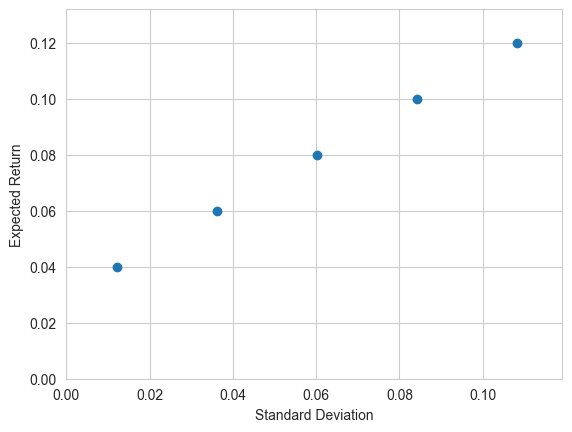

In [24]:
mns = [0.03 + w @ (means - 0.03) for w in portfolios]
stds = [np.sqrt(w @ P @ w) for w in portfolios]
plt.scatter(stds, mns)
plt.xlim((0, 1.1*stdev))
plt.ylim((0, 1.1*mean))
plt.xlabel("Standard Deviation")
plt.ylabel("Expected Return")
plt.show()

## 4.6

*Using this webpage, calculate the cost of equity capital for Apple (CVX) and Walmart (WMT).  Explain why, according to the CAPM, the cost of equity capital is lower for Walmart than for Apple.*

On Feb 3, 2023, AAPL = 16.11% and WMT = 9.24%.  There is more market risk in AAPL (it has a higher beta), so investors require a higher risk premium.